In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df=pd.read_csv("Netflix Userbase.csv")

In [ ]:
df.shape

(2500, 10)

In [ ]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
df.tail

<bound method NDFrame.tail of       User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [ ]:
df.describe

<bound method NDFrame.describe of       User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

     

In [ ]:
df.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [ ]:
df.groupby("Country")["User ID"].count()

Country
Australia         183
Brazil            183
Canada            317
France            183
Germany           183
Italy             183
Mexico            183
Spain             451
United Kingdom    183
United States     451
Name: User ID, dtype: int64

In [ ]:
df.groupby("Subscription Type")["User ID"].count()

Subscription Type
Basic       999
Premium     733
Standard    768
Name: User ID, dtype: int64

In [ ]:
df.groupby("Age")["User ID"].count()

Age
26      1
27     87
28    115
29    104
30    116
31    115
32     92
33     93
34     88
35    105
36     99
37    107
38     89
39    116
40    103
41    114
42    102
43     94
44     86
45     89
46     99
47    111
48    101
49     97
50     84
51     93
Name: User ID, dtype: int64

In [ ]:
df.groupby("Gender")["User ID"].count()

Gender
Female    1257
Male      1243
Name: User ID, dtype: int64

Text(0.5, 1.0, 'Subscription Type Distribution')

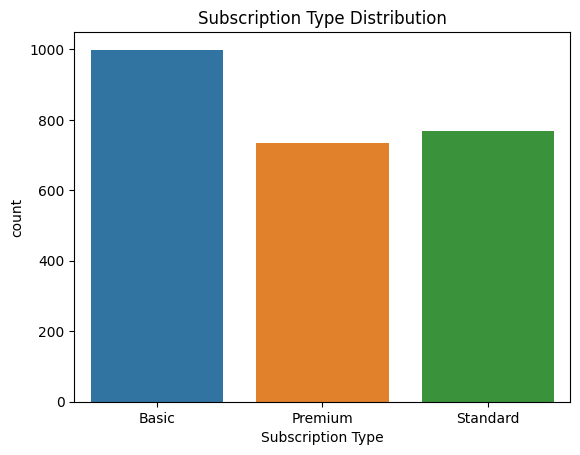

In [ ]:
sns.countplot(data=df, x="Subscription Type")
plt.title("Subscription Type Distribution")

Text(0.5, 1.0, 'Subscription Type Distribution by Gender')

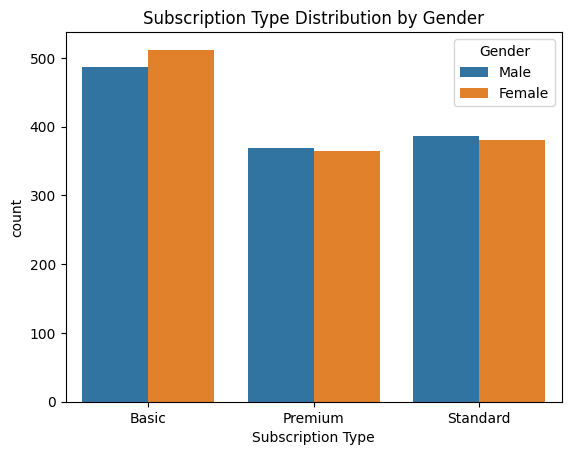

In [ ]:
sns.countplot(data=df, x="Subscription Type", hue="Gender")
plt.title("Subscription Type Distribution by Gender")

Text(0.5, 1.0, 'Top 10 Countries by User Count')

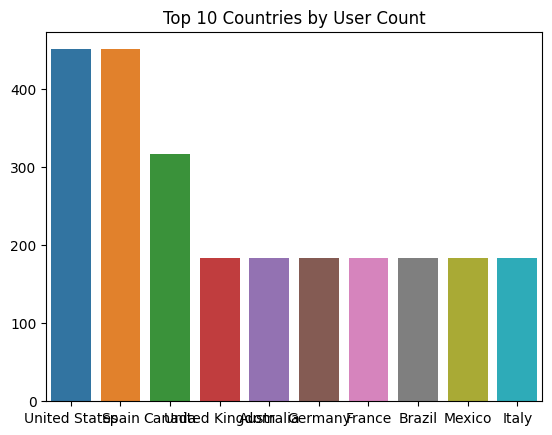

In [ ]:
country_counts = df["Country"].value_counts().head(10)
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title("Top 10 Countries by User Count")

<ipython-input-31-74a89c6c37c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


Text(0.5, 1.0, 'Correlation Heatmap')

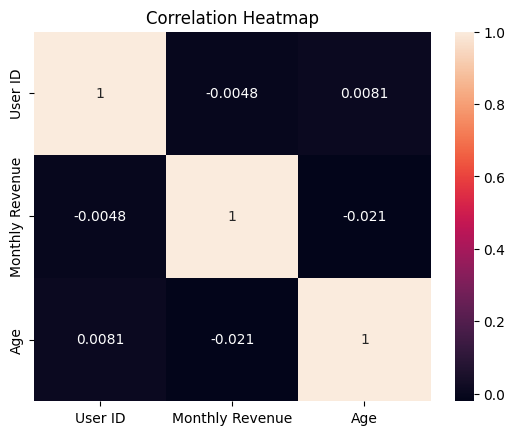

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Age Distribution by Country')

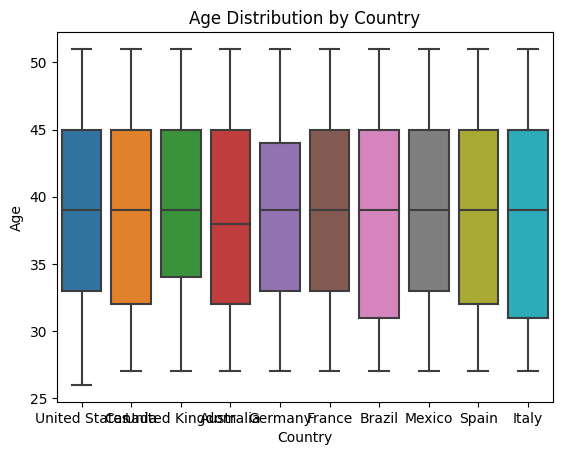

In [ ]:
sns.boxplot(data=df, x="Country", y="Age")
plt.title("Age Distribution by Country")

Text(0.5, 1.02, 'Pair Plot of Numerical Variables')

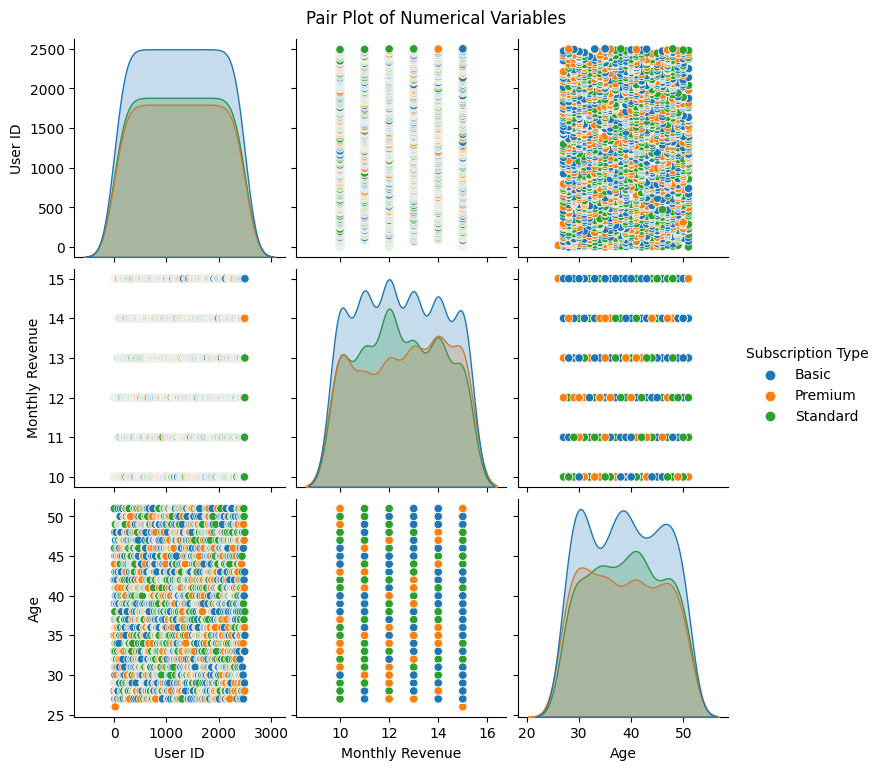

In [ ]:
sns.pairplot(df, hue="Subscription Type", diag_kind="kde")
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)

Text(0.5, 0.98, 'Scatterplot of Age vs. Monthly Revenue by Gender and Subscription Type')

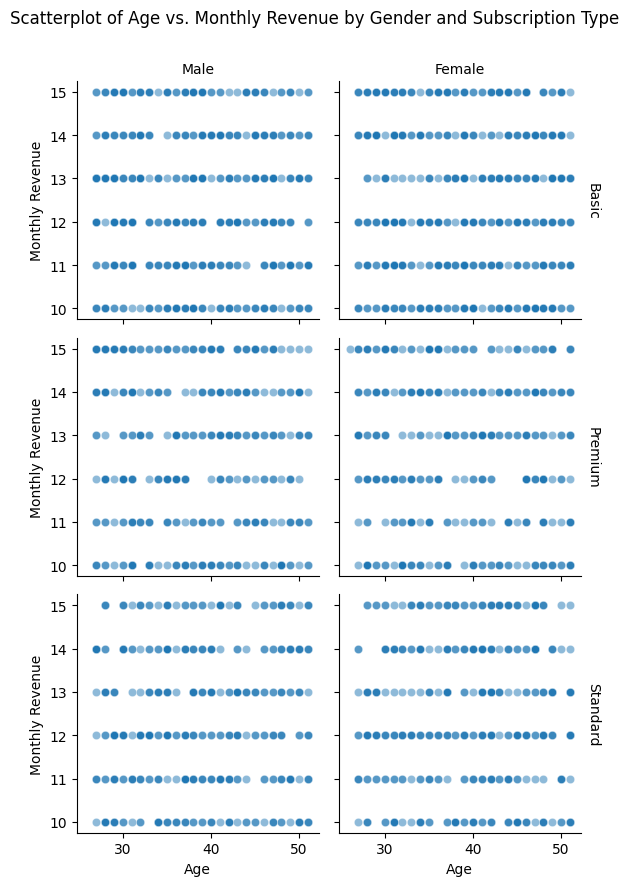

In [ ]:
g = sns.FacetGrid(data=df, col="Gender", row="Subscription Type", margin_titles=True)
g.map(sns.scatterplot, "Age", "Monthly Revenue", alpha=0.5)
g.set_axis_labels("Age", "Monthly Revenue")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Scatterplot of Age vs. Monthly Revenue by Gender and Subscription Type")

Text(0.5, 1.0, 'Violin Plot of Age by Subscription Type and Gender')

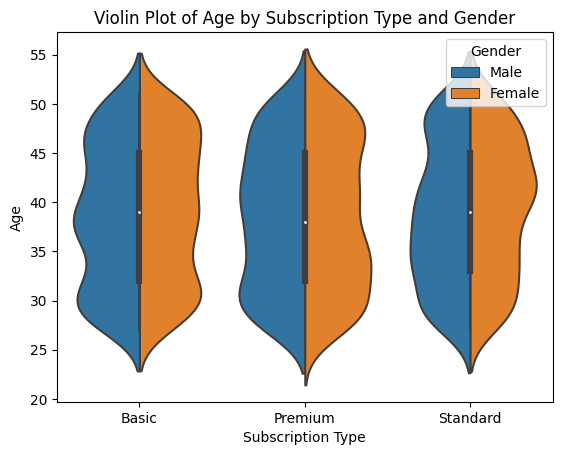

In [ ]:
sns.violinplot(data=df, x="Subscription Type", y="Age", hue="Gender", split=True)
plt.title("Violin Plot of Age by Subscription Type and Gender")

Text(0.5, 1.0, 'Hexbin Plot of Age and Monthly Revenue')

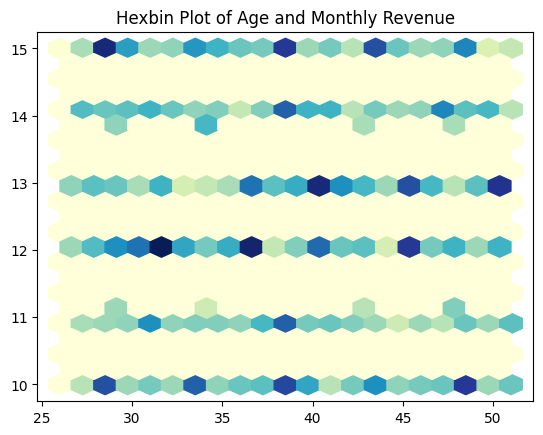

In [ ]:
hb = plt.hexbin(df["Age"], df["Monthly Revenue"], gridsize=20, cmap="YlGnBu")
plt.title("Hexbin Plot of Age and Monthly Revenue")

<ipython-input-44-1bce7b31a7f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), annot=True, cmap="coolwarm")


Text(0.5, 1.0, 'Cluster Map of Correlation Matrix')

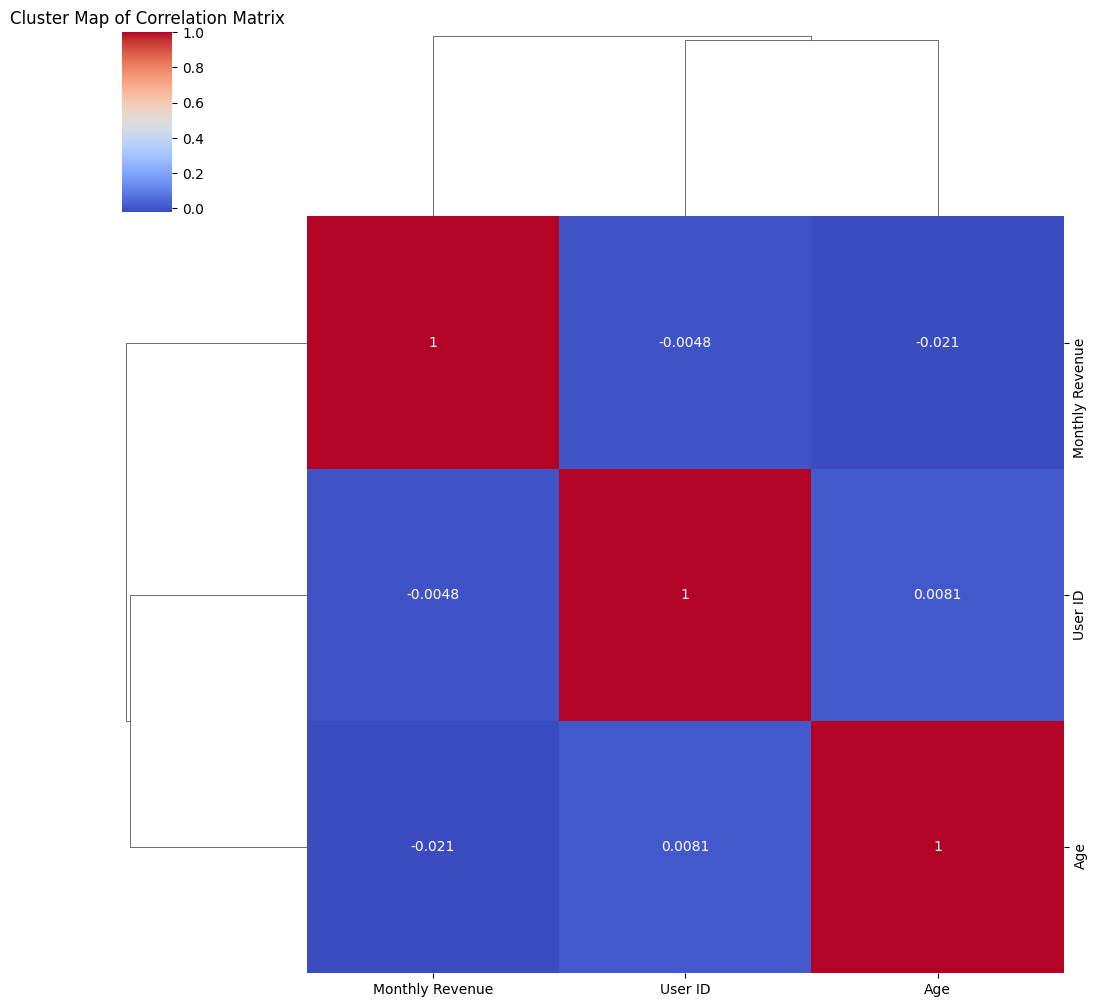

In [ ]:
sns.clustermap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Cluster Map of Correlation Matrix")

Text(0.5, 1.02, 'PairGrid of Numerical Variables by Subscription Type')

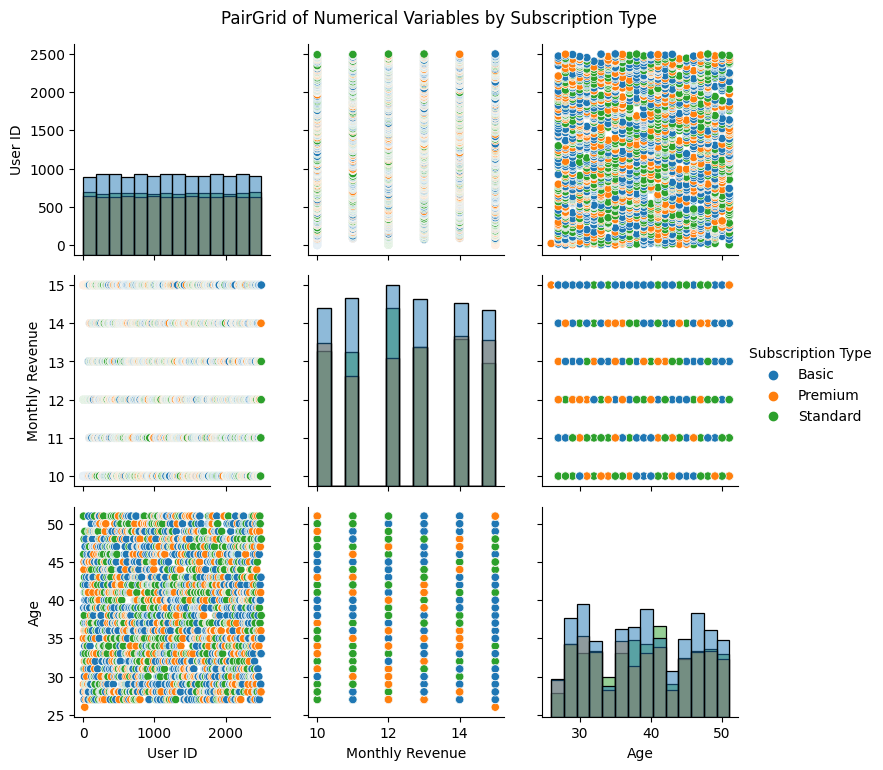

In [ ]:
g = sns.PairGrid(df, hue="Subscription Type")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.suptitle("PairGrid of Numerical Variables by Subscription Type", y=1.02)

In [50]:
fig = px.sunburst(df, path=['Country', 'Gender', 'Subscription Type'], values='Monthly Revenue')
fig.update_layout(title="Sunburst Chart of Country, Gender, and Subscription Type")